# New Section

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import cv2
import os
from glob import glob

In [3]:
images_path = '/content/drive/MyDrive/Colab Notebooks/BDataset/images/'
images = glob(images_path+'*.jpg')
len(images)
for i in images:
  print(i)

/content/drive/MyDrive/Colab Notebooks/BDataset/images/image_388.jpg
/content/drive/MyDrive/Colab Notebooks/BDataset/images/image_389.jpg
/content/drive/MyDrive/Colab Notebooks/BDataset/images/image_390.jpg
/content/drive/MyDrive/Colab Notebooks/BDataset/images/image_391.jpg
/content/drive/MyDrive/Colab Notebooks/BDataset/images/image_392.jpg
/content/drive/MyDrive/Colab Notebooks/BDataset/images/image_393.jpg
/content/drive/MyDrive/Colab Notebooks/BDataset/images/image_394.jpg
/content/drive/MyDrive/Colab Notebooks/BDataset/images/image_395.jpg
/content/drive/MyDrive/Colab Notebooks/BDataset/images/image_396.jpg
/content/drive/MyDrive/Colab Notebooks/BDataset/images/image_397.jpg
/content/drive/MyDrive/Colab Notebooks/BDataset/images/image_399.jpg
/content/drive/MyDrive/Colab Notebooks/BDataset/images/image_398.jpg
/content/drive/MyDrive/Colab Notebooks/BDataset/images/image_400.jpg
/content/drive/MyDrive/Colab Notebooks/BDataset/images/image_401.jpg
/content/drive/MyDrive/Colab Noteb

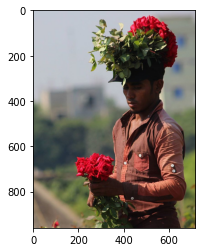

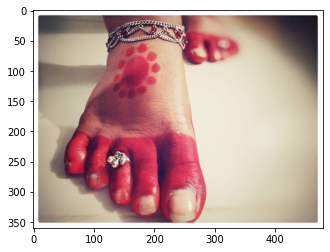

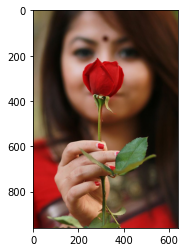

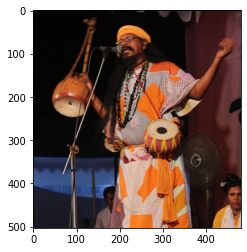

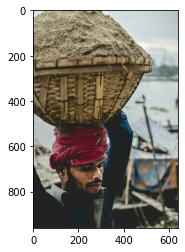

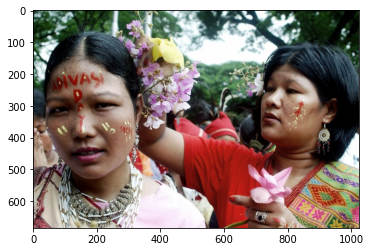

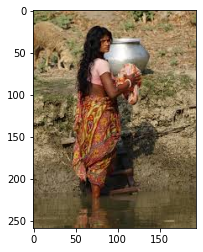

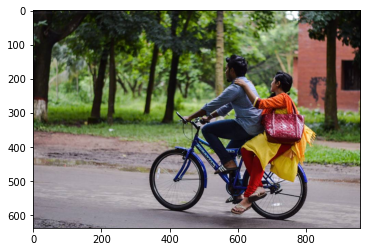

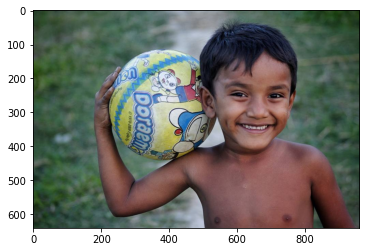

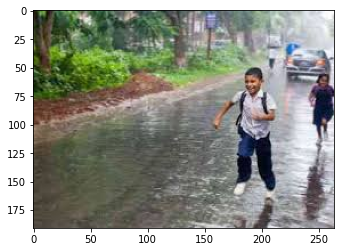

In [4]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.figure()
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [5]:
!pip install resnet
from keras.applications.resnet import ResNet50

incept_model = ResNet50(include_top=True)
incept_model.summary()

  Created wheel for resnet: filename=resnet-0.1-py3-none-any.whl size=10041 sha256=e2e9da40d26df75885ff597ab5942e544cc3777b73bdbdb8d23c18cfb0905092
  Stored in directory: /root/.cache/pip/wheels/38/23/58/6e83e34ced7d4772b88e2e86305f94a1ca497bd87937f5e7ec
Successfully built resnet
102981632/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                        

In [6]:
from keras.models import Model
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)
modele.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [7]:
images_features = {}
count = 0
import matplotlib.pyplot as plt
for i in images:
    img = cv2.imread(i)
    print(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    
    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(2048,)
        
    img_name = i.split('/')[-1]
    
    images_features[img_name] = pred
    
    count += 1
    
    if count > 1197:
        break
        
    elif count % 1 == 0:
        print(count)

/content/drive/MyDrive/Colab Notebooks/BDataset/images/image_388.jpg
1
/content/drive/MyDrive/Colab Notebooks/BDataset/images/image_389.jpg
2
/content/drive/MyDrive/Colab Notebooks/BDataset/images/image_390.jpg
3
/content/drive/MyDrive/Colab Notebooks/BDataset/images/image_391.jpg
4
/content/drive/MyDrive/Colab Notebooks/BDataset/images/image_392.jpg
5
/content/drive/MyDrive/Colab Notebooks/BDataset/images/image_393.jpg
6
/content/drive/MyDrive/Colab Notebooks/BDataset/images/image_394.jpg
7
/content/drive/MyDrive/Colab Notebooks/BDataset/images/image_395.jpg
8
/content/drive/MyDrive/Colab Notebooks/BDataset/images/image_396.jpg
9
/content/drive/MyDrive/Colab Notebooks/BDataset/images/image_397.jpg
10
/content/drive/MyDrive/Colab Notebooks/BDataset/images/image_399.jpg
11
/content/drive/MyDrive/Colab Notebooks/BDataset/images/image_398.jpg
12
/content/drive/MyDrive/Colab Notebooks/BDataset/images/image_400.jpg
13
/content/drive/MyDrive/Colab Notebooks/BDataset/images/image_401.jpg
14
/

In [8]:
len(images_features)

1197

In [40]:
caption_path = "/content/drive/MyDrive/Colab Notebooks/BDataset/captions1.txt"
#caption_path = "/content/drive/MyDrive/Colab Notebooks/flickr8k/Flickr8k.token.txt"
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')
len(captions)

2440

In [41]:
captions_dict = {}
for i in captions:
    try:
        img_name = i.split(',')[0][:] 
        caption = i.split(',')[1]
        if img_name in images_features:
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]

            else:
                captions_dict[img_name].append(caption)

    except:
        pass

In [42]:
len(captions_dict)

1196

In [43]:
print(captions_dict[img_name.split('/')[-1]])

['শস্য ক্ষেতে সার দিচ্ছেন একজন কৃষক ।\r', 'শস্য ক্ষেতে সার ছিটাচ্ছেন একজন কৃষক ।']


['একটি পথশিশু ফুল বিক্রি করছে ।\r', 'গোলাপ বিক্রি করছে ফুল বিক্রেতা ।\r']
['আলতা পায়ে অলংকারে নারী ।\r', 'আলতা রাঙা পা ।\r']
['লাল গোলাপে নারী ।\r', 'লাল গোলাপ হাতে একটি নারী ।\r']
['হাতে একতারা নিয়ে গানে মেতে উঠেছে বাউল ।\r', 'বাউল তার একতারার সুরে মগ্ন ।\r']
['মাথায় করে বালু নিয়ে যাচ্ছে একটি শ্রমিক ।\r', 'মাথায় বালি নিয়ে শ্রমিক ।\r']
['দুজন নারী গালে রং মেখে উৎসব পালন করছে ।\r', 'রঙীন রং এ রাঙা আদিবাসীরা ।\r']
['পুকুরে গোসল শেষে নারী ঘরে ফিরছে ।\r', 'পুকুরে গোসল শেষে নারী ঘরে ফিরছে ।\r']
['ছেলেটি মেয়েকে পিছনে নিয়ে সাইকেল চালাচ্ছে ।\r', 'সাইকেল ভ্রমণ উপভোগ করছে একটি ছেলে মেয়ে ।\r']
['বল হাতে মায়াবী শিশুটি ।\r', 'একটি ছেলে বল ধরে আছে ।\r']
['স্কুল শেষে বৃষ্টি উপভোগ করছে শিশুরা ।\r', 'স্কুল ছুটি শেষে বৃষ্টিতে দৌড়ে বাসায় যাচ্ছে একটি ছেলে ।\r']


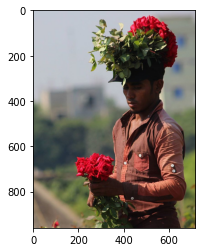

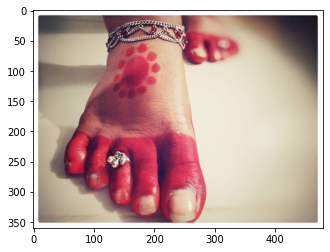

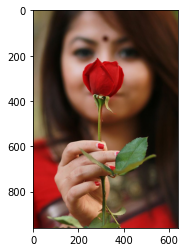

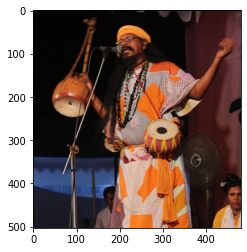

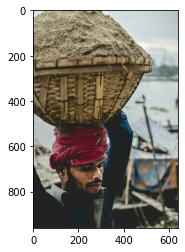

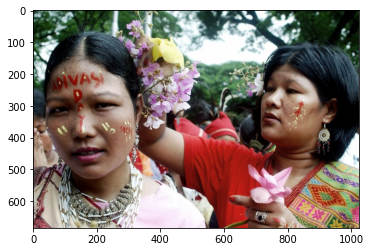

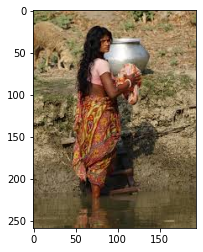

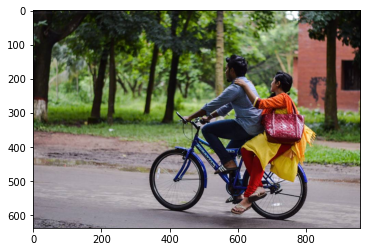

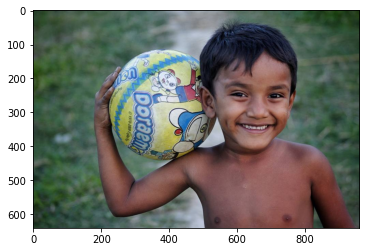

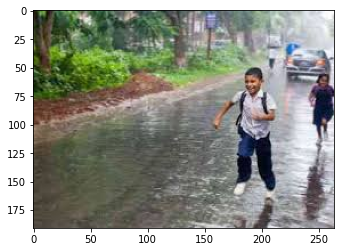

In [52]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.figure()
    img_name = images[i]
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #plt.xlabel(captions_dict[img_name.split('/')[-1]])
    print(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)

['একটি পথশিশু ফুল বিক্রি করছে ।\r', 'গোলাপ বিক্রি করছে ফুল বিক্রেতা ।\r']


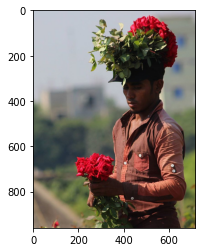

In [56]:
import matplotlib.pyplot as plt

for k in images_features.keys():
    plt.figure()
    
    img_name = '/content/drive/MyDrive/Colab Notebooks/BDataset/images/' + k
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #plt.xlabel(captions_dict[img_name.split('/')[-1]])
    print(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)
    
    break

In [57]:
def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified

In [58]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)

In [59]:
count_words = {}
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:

                count_words[word] = 0

            else:
                count_words[word] += 1

In [60]:
len(count_words)

2381

In [61]:
THRESH = -1
count = 1
new_dict = {}
for k,v in count_words.items():
    if count_words[k] > THRESH:
        new_dict[k] = count
        count += 1

In [62]:
len(new_dict)

2381

In [63]:
new_dict['<OUT>'] = len(new_dict) 
captions_backup = captions_dict.copy()
captions_dict = captions_backup.copy()

In [64]:
for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():  
            if word not in new_dict:
                encoded.append(new_dict['<OUT>'])
            else:
                encoded.append(new_dict[word])


        captions_dict[k][vv.index(v)] = encoded

In [65]:
import keras
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)



[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[1, 24, 21, 14, 25, 3, 4, 26, 27, 28, 22, 23, 12, 13]
[1, 14, 49, 2, 3, 50, 24, 51, 52, 53, 54, 55, 37, 48, 11, 12, 13]
[1, 38, 19, 4, 31, 87, 88, 4, 89, 55, 60, 90, 91, 31, 73, 87, 88, 4, 34, 92, 11, 12, 13]
[1, 272, 50, 191, 332, 134, 333, 334, 275, 335, 50, 336, 337, 338, 245, 129, 68, 67, 37, 339, 340, 191, 341, 342, 343, 12, 13]
[1, 34, 47, 35, 141, 142, 93, 295, 52, 358, 41, 284, 37, 247, 107, 359, 2, 168, 31, 413, 295, 4, 47, 35, 87, 34, 284, 37, 11, 12, 13]


In [66]:
MAX_LEN

31

In [67]:
captions_dict

{'image_1.jpg': [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
  [1, 14, 15, 16, 10, 11, 12, 13]],
 'image_2.jpg': [[1, 17, 18, 19, 4, 20, 21, 22, 23, 12, 13],
  [1, 24, 21, 14, 25, 3, 4, 26, 27, 28, 22, 23, 12, 13]],
 'image_3.jpg': [[1, 29, 30, 31, 24, 32, 4, 33, 34, 35, 36, 11, 12, 13],
  [1, 30, 37, 38, 32, 39, 34, 35, 40, 12, 13]],
 'image_4.jpg': [[1, 41, 42, 29, 43, 44, 45, 46, 12, 13],
  [1, 41, 42, 29, 34, 47, 48, 11, 12, 13]],
 'image_5.jpg': [[1,
   14,
   49,
   2,
   3,
   50,
   24,
   51,
   52,
   53,
   54,
   55,
   37,
   48,
   11,
   12,
   13],
  [1, 14, 49, 55, 37, 48, 11, 12, 13]],
 'image_6.jpg': [[1, 56, 57, 58, 59, 60, 58, 61, 12, 13],
  [1, 62, 63, 58, 64, 58, 61, 12, 13]],
 'image_7.jpg': [[1, 14, 65, 35, 66, 18, 32, 52, 67, 68, 69, 12, 13],
  [1, 66, 18, 32, 52, 34, 35, 69, 12, 13]],
 'image_8.jpg': [[1, 24, 70, 71, 72, 41, 63, 16, 10, 11, 73, 74, 12, 13],
  [1, 75, 76, 77, 10, 11, 12, 13]],
 'image_9.jpg': [[1, 14, 49, 55, 71, 78, 37, 10, 11, 12, 13],
  [1

In [68]:
Batch_size = 5000
VOCAB_SIZE = len(new_dict)

def generator(photo, caption):
    n_samples = 0
    
    X = []
    y_in = []
    y_out = []
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq= [v[:i]]
                out_seq = v[i]

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return X, y_in, y_out

In [69]:
X, y_in, y_out = generator(images_features, captions_dict)
len(X), len(y_in), len(y_out)

(21400, 21400, 21400)

In [70]:
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')

In [71]:
X.shape, y_in.shape, y_out.shape

((21400, 2048), (21400, 31), (21400, 2382))

In [72]:
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [73]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(new_dict)

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               262272    
                                                                 
 repeat_vector (RepeatVector  (None, 31, 128)          0         
 )                                                               
                                                                 
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 31, 128)           304896    
                                                                 
 lstm (LSTM)                 (None, 31, 256)           394240    
                            

In [74]:
model.fit([X, y_in], y_out, batch_size=512, epochs=100)

Epoch 1/100
42/42 [==============================] - 88s 2s/step - loss: 5.8520 - accuracy: 0.1105
Epoch 2/100
42/42 [==============================] - 82s 2s/step - loss: 5.4666 - accuracy: 0.1531
Epoch 3/100
42/42 [==============================] - 83s 2s/step - loss: 5.2592 - accuracy: 0.1963
Epoch 4/100
42/42 [==============================] - 81s 2s/step - loss: 5.0617 - accuracy: 0.2363
Epoch 5/100
42/42 [==============================] - 82s 2s/step - loss: 4.9954 - accuracy: 0.2434
Epoch 6/100
42/42 [==============================] - 81s 2s/step - loss: 4.9019 - accuracy: 0.2470
Epoch 7/100
42/42 [==============================] - 83s 2s/step - loss: 4.8536 - accuracy: 0.2494
Epoch 8/100
42/42 [==============================] - 82s 2s/step - loss: 4.7989 - accuracy: 0.2519
Epoch 9/100
42/42 [==============================] - 81s 2s/step - loss: 4.7326 - accuracy: 0.2586
Epoch 10/100
42/42 [==============================] - 82s 2s/step - loss: 4.6561 - accuracy: 0.2621
Epoch 11/

In [75]:
inv_dict = {v:k for k, v in new_dict.items()}

In [76]:
model.save('model_1.h5')

In [77]:
model.save_weights('mine_model_1_weights.h5')

In [78]:
np.save('vocab.npy', new_dict)

In [109]:
test_p="/content/drive/MyDrive/Colab Notebooks/BDataset/test/"
testpic = glob(test_p+'*.png')
len(testpic)

50

In [125]:
def getImage(x):
    
    test_img_path = images[x]
    #test_img_path = testpic[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (224,224))

    test_img = np.reshape(test_img, (1,224,224,3))
    
    return test_img

 লোকটি সেফটি স্যুট পরে কৃত্রিমভাবে চাষকৃত চাক থেকে থেকে মধু সংগ্রহ করছে ।


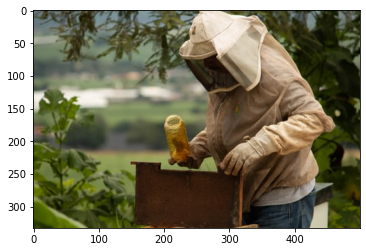

In [129]:
for i in range(1):
    
    no = np.random.randint(1,1000,(1,1))[0,0]
    test_feature = modele.predict(getImage(no)).reshape(1,2048)
    
    test_img_path = images[no]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 25:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(new_dict[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)


        prediction = np.argmax(model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]

        caption = caption + ' ' +sampled_word
            
        if sampled_word == '।':
            break
  
        text_inp.append(sampled_word)
    

    print(caption)
    plt.figure()
    plt.imshow(test_img)
    #plt.xlabel(caption)
    #print(caption)